In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ../src/

/tf/notebooks/src


## Intialization

In [3]:
try:
    import pandas
except:
    !pip install pandas iterative-stratification nlpaug==0.0.20 tqdm click tensorflow_probability==0.11.1 tf2_resnets tensorflow_addons==0.11.1 image-classifiers==0.2.2

### Imports

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import Counter
from scipy.special import expit

In [5]:
from utils.metric import lwlrap

In [6]:
from params import *
from train import get_model
from params import TEST_MELS_PATH, TRAIN_MELS_PATH

In [7]:
from utils.blend import *

## Tools

In [8]:
SUBS = glob.glob('../final_subs/*.csv')
SUBS += glob.glob('../final_subs/removed/*.csv')

names = [s.split('/')[-1] for s in SUBS]

In [9]:
preds = []
indexes = []
for sub in SUBS:
    sub = pd.read_csv(sub)
    indexes.append(sub["recording_id"].values)
    
    preds.append(sub[sub.columns[1:]].values)

In [10]:
names

['submission_theo_0.9504.csv',
 'mcg_ensemble_public_minh905_LB916.csv',
 'submission_ma_best3.csv',
 'blend_mean_teachers.csv',
 'submission_yam.csv',
 'submission_jung_best924.csv',
 'submission_pub_option1.csv',
 'submission_927.csv',
 'submission_931.csv',
 'sub_alex_3.csv',
 'mcg_ensemble_LB894.csv',
 'submission_bert_90x.csv']

In [11]:
preds[8].max(0)

array([0.99858046, 0.9900949 , 0.9995974 , 0.8760548 , 0.9813985 ,
       0.99347925, 0.9895047 , 0.99869967, 0.9984136 , 0.9977702 ,
       0.9997928 , 0.9976834 , 0.99056363, 0.99926376, 0.99911064,
       0.9989058 , 0.99930406, 0.99811107, 0.982219  , 0.999517  ,
       0.99809253, 0.82299715, 0.9989832 , 0.99948245])

In [12]:
preds[names.index('blend_mean_teachers.csv')] = expit(preds[names.index('blend_mean_teachers.csv')])

preds[names.index('mcg_ensemble_public_minh905_LB916.csv')] -= preds[names.index('mcg_ensemble_public_minh905_LB916.csv')].min()
preds[names.index('mcg_ensemble_public_minh905_LB916.csv')] /= preds[names.index('mcg_ensemble_public_minh905_LB916.csv')].max()

In [13]:
preds[names.index('mcg_ensemble_LB894.csv')] = expit(preds[names.index('mcg_ensemble_LB894.csv')])
preds[names.index('sub_alex_3.csv')] /= preds[names.index('sub_alex_3.csv')].max()

In [14]:
RELIABLE = [
    "submission_931.csv",
    "submission_927.csv",
]

In [15]:
for i in range(len(preds)):
    print(f"{names[i]} : {preds[i].min() :.3f}, {preds[i].max():.3f}")

submission_theo_0.9504.csv : 0.008, 0.999
mcg_ensemble_public_minh905_LB916.csv : 0.000, 1.000
submission_ma_best3.csv : 0.003, 1.000
blend_mean_teachers.csv : 0.000, 1.000
submission_yam.csv : 0.011, 0.999
submission_jung_best924.csv : 0.000, 1.000
submission_pub_option1.csv : 0.012, 0.996
submission_927.csv : 0.010, 1.000
submission_931.csv : 0.007, 1.000
sub_alex_3.csv : 0.005, 1.000
mcg_ensemble_LB894.csv : 0.094, 0.998
submission_bert_90x.csv : 0.000, 0.962


In [16]:
for i in range(len(indexes) - 1):
    print((indexes[i] == indexes[i + 1]).all())

True
True
True
True
True
True
True
True
True
True
True


In [17]:
REMOVE_CLS = {}

for c in range(NUM_CLASSES):
    print(f'\n{c}\n')
    REMOVE_CLS[c] = []
    for i in range(len(preds)):
        if preds[i][:, c].min() > 0.2 or preds[i][:, c].max() < 0.95:
            print(f"{names[i]} \t: {preds[i][:, c].min() :.3f}, {preds[i][:, c].max():.3f}")
            if names[i] not in RELIABLE:
                REMOVE_CLS[c].append(names[i])


0

submission_bert_90x.csv 	: 0.000, 0.912

1

sub_alex_3.csv 	: 0.008, 0.944
submission_bert_90x.csv 	: 0.000, 0.725

2

submission_yam.csv 	: 0.187, 0.943

3

mcg_ensemble_public_minh905_LB916.csv 	: 0.146, 0.936
submission_yam.csv 	: 0.078, 0.664
submission_jung_best924.csv 	: 0.333, 0.973
submission_pub_option1.csv 	: 0.176, 0.918
submission_927.csv 	: 0.176, 0.918
submission_931.csv 	: 0.345, 0.876
sub_alex_3.csv 	: 0.040, 0.651
mcg_ensemble_LB894.csv 	: 0.520, 0.994
submission_bert_90x.csv 	: 0.260, 0.717

4

submission_pub_option1.csv 	: 0.014, 0.939
sub_alex_3.csv 	: 0.012, 0.870
submission_bert_90x.csv 	: 0.000, 0.622

5

submission_pub_option1.csv 	: 0.019, 0.950
submission_bert_90x.csv 	: 0.000, 0.697

6

submission_jung_best924.csv 	: 0.000, 0.945
sub_alex_3.csv 	: 0.017, 0.918
submission_bert_90x.csv 	: 0.000, 0.620

7

submission_yam.csv 	: 0.021, 0.900
submission_pub_option1.csv 	: 0.016, 0.921
sub_alex_3.csv 	: 0.012, 0.855
submission_bert_90x.csv 	: 0.000, 0.856

8

s

In [18]:
REMOVE_CLS[3].append('blend_mean_teachers.csv')

In [19]:
names

['submission_theo_0.9504.csv',
 'mcg_ensemble_public_minh905_LB916.csv',
 'submission_ma_best3.csv',
 'blend_mean_teachers.csv',
 'submission_yam.csv',
 'submission_jung_best924.csv',
 'submission_pub_option1.csv',
 'submission_927.csv',
 'submission_931.csv',
 'sub_alex_3.csv',
 'mcg_ensemble_LB894.csv',
 'submission_bert_90x.csv']

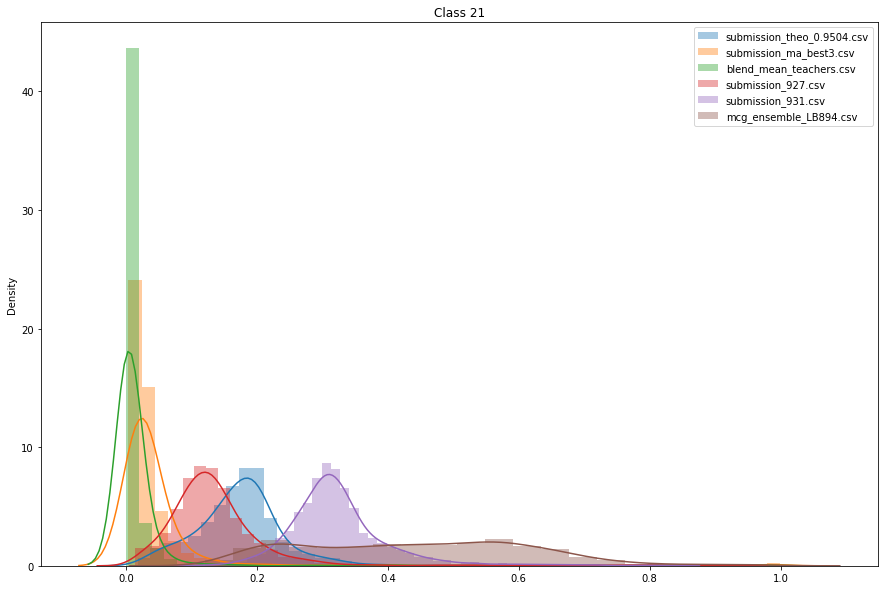

In [20]:
# for c in range(NUM_CLASSES):

c = 21
plt.figure(figsize=(15, 10))

for i in range(len(preds)):
    if c in REMOVE_CLS.keys():
        if names[i] in REMOVE_CLS[c]:
            continue
    sns.distplot(preds[i][:, c], label=names[i])

plt.title(f'Class {c}')
plt.legend()
plt.show()

In [21]:
def compute_corrs(preds):
    corrs = np.zeros((len(preds), len(preds)))

    for i in tqdm(range(len(preds[0]))):
        df_corr = pd.DataFrame([p[i] for p in preds]).T.rank().corr()
        corrs += df_corr.values / len(preds[0])

    return corrs

In [22]:
corrs = compute_corrs(preds)

  0%|          | 0/1992 [00:00<?, ?it/s]

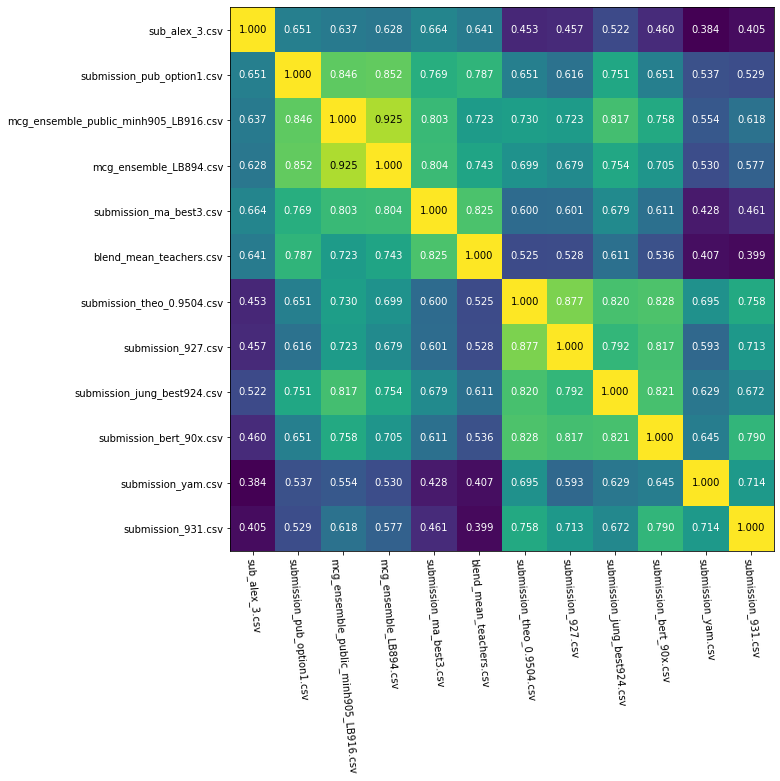

In [23]:
_ = plot_corr(corrs, names)

In [24]:
def to_rank(pred):
    return pd.DataFrame(pred).T.rank().T.values / NUM_CLASSES

In [25]:
def clever_blend(preds, weights, names, remove_cls):
    blend = np.zeros(preds[0].shape)
    count = np.zeros((1, NUM_CLASSES))
    
    for i in range(len(preds)):
        for c in range(NUM_CLASSES):
            if names[i] not in remove_cls[c]:
                count[:, c] += weights[names[i]]
                blend[:, c] += weights[names[i]] * preds[i][:, c]
#             else:
#                 print(f'Pred {names[i]} : Not using class {c}')
    
    return blend / count

In [26]:
weights = {
    'submission_theo_0.9504.csv': 5,
    'mcg_ensemble_public_minh905_LB916.csv': 2,
    'submission_ma_best3.csv': 2,
    'blend_mean_teachers.csv': 2,
    'submission_yam.csv': 1,
    'submission_jung_best924.csv': 2,
    'submission_pub_option1.csv': 1,
    'submission_927.csv': 10,
    'submission_931.csv': 10,
    'sub_alex_3.csv': 1,
    'mcg_ensemble_LB894.csv': 1,
    'submission_bert_90x.csv': 1,
}

In [27]:
names

['submission_theo_0.9504.csv',
 'mcg_ensemble_public_minh905_LB916.csv',
 'submission_ma_best3.csv',
 'blend_mean_teachers.csv',
 'submission_yam.csv',
 'submission_jung_best924.csv',
 'submission_pub_option1.csv',
 'submission_927.csv',
 'submission_931.csv',
 'sub_alex_3.csv',
 'mcg_ensemble_LB894.csv',
 'submission_bert_90x.csv']

In [28]:
preds_rank = [to_rank(pred) for pred in preds] 

In [29]:
blend = clever_blend(preds_rank, weights, names, REMOVE_CLS)

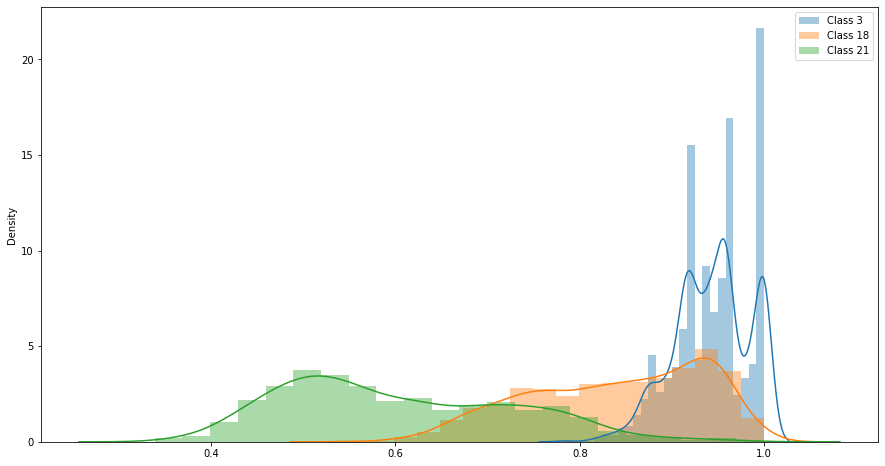

In [30]:
plt.figure(figsize=(15, 8))
to_plot = [3, 18, 21]
for c in to_plot:
    sns.distplot(blend[:, c], label=f'Class {c}')

plt.legend()
plt.show()

## Eval

In [31]:
sub = pd.read_csv(DATA_PATH + "sample_submission.csv")

In [32]:
ref = pd.read_csv("../output/submission_0941+.csv")

top_k = 5
y = []
for i in range(len(ref)):
    lim = sorted(ref.iloc[i].values[1:])[-top_k]
    y.append((ref.iloc[i].values[1:] >= lim).astype(int))
    
y = np.array(y)
# y = (preds > 0.5).astype(int)

In [33]:
score = lwlrap(y, blend)[-1]
print(f'Ref score : {score:.4f}')

Ref score : 0.9756


In [34]:
sub[sub.columns[1:]] = blend

In [35]:
name = "safe_blend_rank.csv"
sub.to_csv(OUT_DIR + name, index=False)

print(f'Saved submission to {OUT_DIR + name}')

Saved submission to ../output/safe_blend_rank.csv


## Train